In [1]:
import math
import random
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [24]:
# For this import to work you need to:
# - Install the python library `pip install graphviz`
# - Install graphviz : https://www.graphviz.org/download/
from graphviz import Digraph
import os
os.environ["PATH"] += os.pathsep + r'C:\Program Files (x86)\Graphviz\bin'

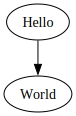

In [13]:
# This should draw a Hello world diagram
g = Digraph(format='svg', graph_attr={'rankdir': 'TB'})

g.edge('Hello', 'World')

g

In [14]:
# code to display a network - do not modify this cell
def trace(root):
    nodes, edges = set(), set()
    def build(v):
        if v not in nodes:
            nodes.add(v)
            for child in v._prev:
                edges.add((child, v))
                build(child)
    build(root)
    return nodes, edges

def draw_dot(root, format='svg', rankdir='LR'):
    """
    format: png | svg | ...
    rankdir: TB (top to bottom graph) | LR (left to right)
    """
    assert rankdir in ['LR', 'TB']
    nodes, edges = trace(root)
    dot = Digraph(format=format, graph_attr={'rankdir': rankdir}) #, node_attr={'rankdir': 'TB'})
    
    layer_colors = ["#FFCCCC", "#CCFFCC", "#CCCCFF", "#FFCC99", "#99CCFF"]
    
    def get_color(node):
        if node._op == '+': return layer_colors[0]
        elif node._op == '*': return layer_colors[1]
        elif node._op == 'tanh': return layer_colors[2]
        # Ajoutez d'autres conditions ici pour d'autres opérations ou couches
        return layer_colors[-1]  # Couleur par défaut
    
    for n in nodes:
        color = get_color(n)
        dot.node(name=str(id(n)), label="{ %s | data %.4f | grad %.4f }" % (n.label, n.data, n.grad), shape='record', style='filled', fillcolor=color)
        if n._op:
            dot.node(name=str(id(n)) + n._op, label=n._op)
            dot.edge(str(id(n)) + n._op, str(id(n)))
    
    for n1, n2 in edges:
        dot.edge(str(id(n1)), str(id(n2)) + n2._op)
    
    return dot

In [5]:
class Value:
    def __init__(self, label, data, children=[]):
        self.label = label
        self.data = data
        self.grad = .0
        self._prev = children
        self._op = '+'

In [15]:
a = Value('a', 1.5)
b = Value('b', 2.5)
c = Value('c', 4.0, children=[a,b])

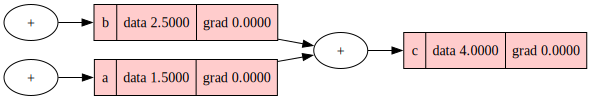

In [16]:
# This should draw a small graph
draw_dot(c)